<a href="https://colab.research.google.com/github/alimoorreza/CS167-SP25-Notebook-5/blob/main/Notebook5_part1_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook\#5

##__Hints/ Tips Tricks__
If you want to accelerate the training process using graphical processing unit (GPU), do so from Colab's 'Notebook Settings' by enabling GPU:
  - Runtime-->Change runtime type-->GPU or TPU


# CIFAR-10 Dataset visualization
Let's import [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) from PyTorch's [_torchvision.datasets_ module](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10)
  - Each image size: __32x32x3__
    - Note that these are color images, unlike Fashion-MNIST, which was grayscale with only one channel.
  - Each image is associated with a label from __10 classes__
  - Training set of __50000__ examples and test set of __10000__ examples

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp25/notes/images/cifar-10-sprite.png" width=500/>
</div>


100%|██████████| 170498071/170498071 [00:04<00:00, 37932972.41it/s]


Extracting /content/drive/MyDrive/cs167_sp24/datasets/cifar-10-python.tar.gz to /content/drive/MyDrive/cs167_sp24/datasets
Files already downloaded and verified


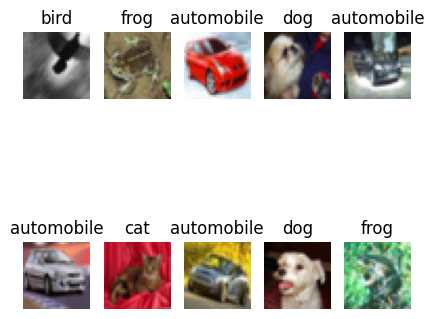

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets # torchvision has many deep learning benchmark datasets Fashion-MNIST, CIFAR-10, Caltech-50, etc
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np



training_data = datasets.CIFAR10(
    root="/content/drive/MyDrive/cs167_sp25/datasets", # CHANGE THIS TO POINT TO YOUR OWN PATH
    train=True,          # if True, creates dataset from training set, otherwise creates from test set.
    download=True,
    transform=ToTensor() # specify the feature and label transformations
)

test_data = datasets.CIFAR10(
    root="/content/drive/MyDrive/cs167_sp25/datasets", # CHANGE THIS TO POINT TO YOUR OWN PATH
    train=False,         # if True, creates dataset from training set, otherwise creates from test set.
    download=True,
    transform=ToTensor() # specify the feature and label transformations
)

labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

# Visualize a random set of images and their the labels from the training split
figure = plt.figure(figsize=(5, 5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(np.moveaxis(img.numpy(), 0, -1)) # converting a tensor of size: [3, 32, 32] --> numpy array of size: [32, 32, 3]

plt.show()

#__Task 1__: Learn a Multilayer Perceptron (MLP) for this 10-class classification task

In [ ]:
# Step 1: load the Torch library and other utilities
#----------------------------------------------------
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import time

# check to see if torch.cuda is available, otherwise it will use CPU
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")


# Step 2: load the dataset, ie, we are experimenting with Fashion-MNIST
#--------------------------------------------------------------------------------------------------

training_data = datasets.CIFAR10(
    root="/content/drive/MyDrive/cs167_sp25/datasets", # CHANGE THIS TO POINT TO YOUR OWN PATH
    train=True,          # if True, creates dataset from training set, otherwise creates from test set.
    download=True,
    transform=ToTensor() # specify the feature and label transformations
)

test_data = datasets.CIFAR10(
    root="/content/drive/MyDrive/cs167_sp25/datasets", # CHANGE THIS TO POINT TO YOUR OWN PATH
    train=False,         # if True, creates dataset from training set, otherwise creates from test set.
    download=True,
    transform=ToTensor() # specify the feature and label transformations
)


# Step 3: Create your MLP Network (call it SimpleMLPv4) with 3 hidden layers
#--------------------------------------------------------------------------------------------------
# You should have the following structure in your MLP
#   num_of_neurons_input_layer      = Do your calculations and determine the correct number (Hint: It should depend on the input image resolutions of your dataset).
#   num_of_neurons_1st_hidden_layer = 512
#   num_of_neurons_2nd_hidden_layer = 256
#   num_of_neurons_3rd_hidden_layer = 128
#   num_of_neurons_output_layer     = Determine the correct number (Hint: It should depend on how many classes you have for your classification task).
# You should use ReLU activation function in each hidden layer
#--------------------------------------------------------------------------------------------------
class SimpleMLPv4(nn.Module):
  def __init__(self):
    super().__init__()
    # TBD: your network layer construction should take place here
    # ...
    # ...
    # ...



  def forward(self, x):
    # your code for MLP forward pass should take place here

    return


# Step 4: Your training and testing functions (you can copy it from the previous demo)
#--------------------------------------------------------------------------------------

def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)

    model.train()                   # set the model to training mode for best practices

    train_loss = 0

    for batch, (X, y) in enumerate(dataloader):

        # compute prediction and loss
        X = X.to(device)                  # send data to the GPU device (if available)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return train_loss/len(dataloader)

def test_loop(dataloader, model, loss_fn):

    model.eval()                    # set the model to evaluation mode for best practices

    size        = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:

            X = X.to(device)                     # send data to the GPU device (if available)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

# Step 5: prepare the DataLoader and select your optimizer and set the hyper-parameters for learning the model from DataLoader
#------------------------------------------------------------------------------------------------------------------------------
# SUGGESTION: use a large value for 'epochs' so that your model has enough time to learn useful parameters.





In [ ]:
# Step 6: visualizing the loss curves
#------------------------------------------------------------------------------------------------------------------------------

